In [2]:
import pandas as pd
import numpy as np

Catenating datasets

In [13]:
def makedf(cols, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [17]:
a = makedf("AB", [0, 1])
a

,A,B
0,A0,B0
1,A1,B1


In [19]:
b = makedf("AB", [2, 3])
b

,A,B
2,A2,B2
3,A3,B3


In [21]:
c = makedf("CD", [0, 1])
c

,C,D
0,C0,D0
1,C1,D1


In [23]:
d = makedf("BC", [2, 3])
d

,B,C
2,B2,C2
3,B3,C3


In [25]:
pd.concat([a, b])  # The default axis is 0

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [27]:
r = pd.concat([a, a])
r

,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


In [29]:
r.loc[0, "A"]

0    A0
0    A0
Name: A, dtype: object

In [33]:
try:
    pd.concat([a, a], verify_integrity=True)
except ValueError as e:
    import sys
    print(e, file=sys.stderr)

Indexes have overlapping values: Index([0, 1], dtype='int64')


In [35]:
pd.concat([a, a], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


In [37]:
r2 = pd.concat([a, a], keys=["first", "second"])
r2

A   B
first  0  A0  B0
       1  A1  B1
second 0  A0  B0
       1  A1  B1

In [39]:
r2["A"]["first"][0]

'A0'

In [41]:
pd.concat([a, c], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [43]:
pd.concat([a, d], sort=False)  # Sort option used to silence a deprecation message

,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN
2,NaN,B2,C2
3,NaN,B3,C3


In [45]:
pd.concat([a, d], join="inner")

,B
0,B0
1,B1
2,B2
3,B3


Exercise 5.1 (split date continues)

In [58]:
import pandas as pd

def split_date(df):
    """Splits Päivämäärä column into DataFrame with five columns,
    Weekday, Day, Month, Year, and Hour
    """  
    # Split the date into specific columns and add column names
    df = df["Päivämäärä"].str.split(expand=True)
    df.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    # Convert weekdays
    weekdays = {
        "ma": "Mon",
        "ti": "Tue",
        "ke": "Wed",
        "to": "Thu",
        "pe": "Fri",
        "la": "Sat",
        "su": "Sun"
        }
    df.Weekday = df.Weekday.map(weekdays)
    #df.Weekday.replace(weekdays, inplace=True)

    # Convert months
    months = {
        "tammi": 1,
        "helmi": 2,
        "maalis": 3,
        "huhti": 4,
        "touko": 5,
        "kesä": 6,
        "heinä": 7,
        "elo": 8,
        "syys": 9,
        "loka": 10,
        "marras": 11,
        "joulu": 12
    }
    df.Month = df.Month.map(months)

    # Drop columns and minutes for hours
    df.Hour = df.Hour.str.extract(r"(\d+):")
    #df.Hour = df.Hour.str.findall(r"(\d+):").str[0]
    #df.Hour = df.Hour.str.findall(r"(\d+):").str.join("")
    
    # Convert types
    df = df.astype({"Day": int, "Year": int, "Hour": int})

    return df

def split_date_continues():
    """Reads in bicycle data set, cleans data, drops Päivämäärä
    column and replaces with splitted date components
    """
    # Read in and clean data
    df = pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")

    # Drop empty rows
    df.dropna(how="all", inplace=True)

    # Drop columns only containing missing values
    df.dropna(axis=1, how="all", inplace=True)  

    # Grab splitted date data
    date_data = split_date(df)

    # Drop Päivämäärä column
    df.drop(columns="Päivämäärä", inplace=True)

    # Add split date data to lhs of the original data
    result = pd.concat([date_data, df], axis=1)

    return result

def main():
    df = split_date_continues()
    print("Shape:", df.shape)
    print("Column names:\n", df.columns)
    print(df.head())


if __name__ == "__main__":
    main()


Shape: (37128, 25)
Column names:
 Index(['Weekday', 'Day', 'Month', 'Year', 'Hour', 'Auroransilta',
       'Eteläesplanadi', 'Huopalahti (asema)', 'Kaisaniemi/Eläintarhanlahti',
       'Kaivokatu', 'Kulosaaren silta et.', 'Kulosaaren silta po. ',
       'Kuusisaarentie', 'Käpylä, Pohjoisbaana',
       'Lauttasaaren silta eteläpuoli', 'Merikannontie',
       'Munkkiniemen silta eteläpuoli', 'Munkkiniemi silta pohjoispuoli',
       'Heperian puisto/Ooppera', 'Pitkäsilta itäpuoli',
       'Pitkäsilta länsipuoli', 'Lauttasaaren silta pohjoispuoli',
       'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')
  Weekday  Day  Month  Year  Hour  Auroransilta  Eteläesplanadi  \
0     Wed    1      1  2014     0           NaN             7.0   
1     Wed    1      1  2014     1           NaN             5.0   
2     Wed    1      1  2014     2           NaN             2.0   
3     Wed    1      1  2014     3           NaN             5.0   
4     Wed    1      1  2014     4           Na

Suggested solution:

In [61]:
import pandas as pd
 
days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1, 13)))
 
def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
 
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]
 
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d
 
def split_date_continues():
    df = pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")
    d = split_date(df)
    df = df.drop("Päivämäärä", axis=1)
    result = pd.concat([d, df], axis=1)
    return result
 
def main():
    df = split_date_continues()
    print("Shape:", df.shape)
    print("Column names:\n", df.columns)
    print(df.head())
 
 
if __name__ == "__main__":
    main()

Shape: (37128, 25)
Column names:
 Index(['Weekday', 'Day', 'Month', 'Year', 'Hour', 'Auroransilta',
       'Eteläesplanadi', 'Huopalahti (asema)', 'Kaisaniemi/Eläintarhanlahti',
       'Kaivokatu', 'Kulosaaren silta et.', 'Kulosaaren silta po. ',
       'Kuusisaarentie', 'Käpylä, Pohjoisbaana',
       'Lauttasaaren silta eteläpuoli', 'Merikannontie',
       'Munkkiniemen silta eteläpuoli', 'Munkkiniemi silta pohjoispuoli',
       'Heperian puisto/Ooppera', 'Pitkäsilta itäpuoli',
       'Pitkäsilta länsipuoli', 'Lauttasaaren silta pohjoispuoli',
       'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')
  Weekday  Day  Month  Year  Hour  Auroransilta  Eteläesplanadi  \
0     Wed    1      1  2014     0           NaN             7.0   
1     Wed    1      1  2014     1           NaN             5.0   
2     Wed    1      1  2014     2           NaN             2.0   
3     Wed    1      1  2014     3           NaN             5.0   
4     Wed    1      1  2014     4           Na

Merging dataframes

In [64]:
df = pd.DataFrame(
    [[1000, "Jack", 21], [1500, "John", 29]],
    columns=["Wage", "Name", "Age"])
df

,Wage,Name,Age
0,1000,Jack,21
1,1500,John,29


In [66]:
df2 = pd.DataFrame({"Name": ["John", "Jack"], "Occupation": ["Plumber", "Carpenter"]})
df2

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter


In [68]:
pd.merge(df, df2)

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [70]:
df3 = pd.concat([df2, pd.DataFrame(
    {"Name": ["James"], "Occupation": ["Painter"]})], ignore_index=True)
df3

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter
2,James,Painter


In [72]:
pd.merge(df, df3)  # By default an inner join is computed

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [74]:
pd.merge(df, df3, how="outer")  # Outer join

,Wage,Name,Age,Occupation
0,1000.0,Jack,21.0,Carpenter
1,NaN,James,NaN,Painter
2,1500.0,John,29.0,Plumber


In [76]:
books = pd.DataFrame(
    {"Title": ["War and Peace", "Good Omens", "Good Omens"],
     "Author": ["Tolstoi", "Terry Pratchett", "Neil Gaiman"]}
)
books

,Title,Author
0,War and Peace,Tolstoi
1,Good Omens,Terry Pratchett
2,Good Omens,Neil Gaiman


In [78]:
collections = pd.DataFrame(
    [["Oodi", "War and Peace"],
     ["Oodi", "Good Omens"],
     ["Pasila", "Good Omens"],
     ["Kallio", "War and Peace"]],
    columns = ["Library", "Title"]
)
collections

,Library,Title
0,Oodi,War and Peace
1,Oodi,Good Omens
2,Pasila,Good Omens
3,Kallio,War and Peace


In [80]:
libraries_with_books_by = pd.merge(books, collections)
libraries_with_books_by

,Title,Author,Library
0,War and Peace,Tolstoi,Oodi
1,War and Peace,Tolstoi,Kallio
2,Good Omens,Terry Pratchett,Oodi
3,Good Omens,Terry Pratchett,Pasila
4,Good Omens,Neil Gaiman,Oodi
5,Good Omens,Neil Gaiman,Pasila


Exercise 5.2 (cycling weather)

In [83]:
import pandas as pd

def split_date(df):
    """Splits Päivämäärä column into DataFrame with five columns,
    Weekday, Day, Month, Year, and Hour
    """  
    # Split the date into specific columns and add column names
    df = df["Päivämäärä"].str.split(expand=True)
    df.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    # Convert weekdays
    weekdays = {
        "ma": "Mon",
        "ti": "Tue",
        "ke": "Wed",
        "to": "Thu",
        "pe": "Fri",
        "la": "Sat",
        "su": "Sun"
        }
    df.Weekday = df.Weekday.map(weekdays)
    #df.Weekday.replace(weekdays, inplace=True)

    # Convert months
    months = {
        "tammi": 1,
        "helmi": 2,
        "maalis": 3,
        "huhti": 4,
        "touko": 5,
        "kesä": 6,
        "heinä": 7,
        "elo": 8,
        "syys": 9,
        "loka": 10,
        "marras": 11,
        "joulu": 12
    }
    df.Month = df.Month.map(months)

    # Drop columns and minutes for hours
    df.Hour = df.Hour.str.extract(r"(\d+):")
    #df.Hour = df.Hour.str.findall(r"(\d+):").str[0]
    #df.Hour = df.Hour.str.findall(r"(\d+):").str.join("")
    
    # Convert types
    df = df.astype({"Day": int, "Year": int, "Hour": int})

    return df

def split_date_continues():
    """Reads in bicycle data set, cleans data, drops Päivämäärä
    column and replaces with splitted date components
    """
    # Read in and clean data
    df = pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")

    # Drop empty rows
    df.dropna(how="all", inplace=True)

    # Drop columns only containing missing values
    df.dropna(axis=1, how="all", inplace=True)  

    # Grab splitted date data
    date_data = split_date(df)

    # Drop Päivämäärä column
    df.drop(columns="Päivämäärä", inplace=True)

    # Add split date data to lhs of the original data
    result = pd.concat([date_data, df], axis=1)

    return result

def cycling_weather():
    """Reads cycling and weather data sets and returns
    resulting DataFrame after merging along year, month, and day
    """
    cycling = split_date_continues()
    weather = pd.read_csv("kumpula-weather-2017.csv")
    merged = pd.merge(
        cycling, weather,
        left_on=["Year", "Month", "Day"],
        right_on=["Year", "m", "d"]
    )
    # Drop useless columns
    merged.drop(columns=["m", "d", "Time", "Time zone"], inplace=True)
    return merged

def main():
    df = cycling_weather()
    print(df.columns)
    print(df)

if __name__ == "__main__":
    main()

Index(['Weekday', 'Day', 'Month', 'Year', 'Hour', 'Auroransilta',
       'Eteläesplanadi', 'Huopalahti (asema)', 'Kaisaniemi/Eläintarhanlahti',
       'Kaivokatu', 'Kulosaaren silta et.', 'Kulosaaren silta po. ',
       'Kuusisaarentie', 'Käpylä, Pohjoisbaana',
       'Lauttasaaren silta eteläpuoli', 'Merikannontie',
       'Munkkiniemen silta eteläpuoli', 'Munkkiniemi silta pohjoispuoli',
       'Heperian puisto/Ooppera', 'Pitkäsilta itäpuoli',
       'Pitkäsilta länsipuoli', 'Lauttasaaren silta pohjoispuoli',
       'Ratapihantie', 'Viikintie', 'Baana', 'Precipitation amount (mm)',
       'Snow depth (cm)', 'Air temperature (degC)'],
      dtype='object')
     Weekday  Day  Month  Year  Hour  Auroransilta  Eteläesplanadi  \
0        Sun    1      1  2017     0           NaN            11.0   
1        Sun    1      1  2017     1           NaN             3.0   
2        Sun    1      1  2017     2           NaN             2.0   
3        Sun    1      1  2017     3           NaN    

Exercise 5.3 (top bands)

In [86]:
import pandas as pd

def top_bands():
    """Merges UK top 40 bands and bands stored in src folder"""
    # Read in data
    top_40 = pd.read_csv("UK-top40-1964-1-2.tsv", sep="\t")
    bands = pd.read_csv("bands.tsv", sep="\t")
    # Convert to mergable format
    bands.Band = bands.Band.str.upper()
    return pd.merge(top_40, bands, left_on="Artist", right_on="Band")

def main():
    df = top_bands()
    print(df.columns)
    print(df)

if __name__ == "__main__":
    main()

Index(['Pos', 'LW', 'Title', 'Artist', 'Publisher', 'Peak Pos', 'WoC', 'Band',
       'Singer', 'Lead guitar', 'Rhythm guitar', 'Bass', 'Drums'],
      dtype='object')
   Pos  LW                     Title                       Artist   Publisher  \
0    1   1  I WANT TO HOLD YOUR HAND                  THE BEATLES  PARLOPHONE   
1    2   6             GLAD ALL OVER          THE DAVE CLARK FIVE    COLUMBIA   
2    3   2             SHE LOVES YOU                  THE BEATLES  PARLOPHONE   
3    4   3      YOU WERE MADE FOR ME     FREDDIE AND THE DREAMERS    COLUMBIA   
4   12  11                  GERONIMO                  THE SHADOWS    COLUMBIA   
5   15  14       I WANNA BE YOUR MAN           THE ROLLING STONES       DECCA   
6   16  12   YOU'LL NEVER WALK ALONE     GERRY AND THE PACEMAKERS    COLUMBIA   
7   17  17                      STAY                  THE HOLLIES  PARLOPHONE   
8   31  24           HUNGRY FOR LOVE  JOHNNY KIDD AND THE PIRATES         HMV   

   Peak Pos  WoC     

Aggregates and groupings

In [89]:
wh = pd.read_csv("https://raw.githubusercontent.com/csmastersUH/data_analysis_with_python_2020/master/kumpula-weather-2017.csv")

In [91]:
wh3 = wh.rename(
    columns={"m": "Month",
             "d": "Day",
             "Precipitation amount (mm)": "Precipitation",
             "Snow depth (cm)": "Snow",
             "Air temperature (degC)": "Temperature"}
)
wh3.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


In [93]:
groups = wh3.groupby("Month")
groups

In [95]:
len(groups)

12

In [97]:
for key, group in groups:
    print(key, len(group))

1 31
2 28
3 31
4 30
5 31
6 30
7 31
8 31
9 30
10 31
11 30
12 31


In [99]:
groups.get_group(2)  # Group with index two is February

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
31,2017,2,1,00:00,UTC,1.5,4.0,-0.6
32,2017,2,2,00:00,UTC,0.2,5.0,-0.8
33,2017,2,3,00:00,UTC,-1.0,6.0,-0.2
34,2017,2,4,00:00,UTC,2.7,6.0,0.4
35,2017,2,5,00:00,UTC,-1.0,7.0,-2.5
36,2017,2,6,00:00,UTC,-1.0,7.0,-7.3
37,2017,2,7,00:00,UTC,-1.0,8.0,-12.1
38,2017,2,8,00:00,UTC,-1.0,8.0,-8.8
39,2017,2,9,00:00,UTC,-1.0,8.0,-10.1
40,2017,2,10,00:00,UTC,-1.0,8.0,-8.3


In [101]:
groups["Temperature"]

In [103]:
groups["Temperature"].mean()

Month
1     -2.316129
2     -2.389286
3      0.983871
4      2.676667
5      9.783871
6     13.726667
7     16.035484
8     16.183871
9     11.826667
10     5.454839
11     3.950000
12     1.741935
Name: Temperature, dtype: float64

In [105]:
groups["Precipitation"].sum()

Month
1      26.9
2      21.0
3      29.7
4      26.9
5      -5.9
6      59.3
7      14.2
8      70.1
9      51.2
10    173.5
11    117.2
12    133.6
Name: Precipitation, dtype: float64

In [111]:
wh4 = wh3.copy()
wh4.loc[wh4.Precipitation == -1, "Precipitation"] = 0
wh4.loc[wh4.Snow == -1, "Snow"] = 0
wh4.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,0.0,0.0,0.6
1,2017,1,2,00:00,UTC,4.4,0.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,0.0,13.0,-12.8
4,2017,1,5,00:00,UTC,0.0,10.0,-17.8


In [113]:
wh4.groupby("Month")["Precipitation"].sum()

Month
1      38.9
2      35.0
3      41.7
4      39.9
5      16.1
6      76.3
7      31.2
8      86.1
9      65.2
10    184.5
11    120.2
12    140.6
Name: Precipitation, dtype: float64

Other ways to operate on groups

In [118]:
def myfilter(df):  # The filter function must return a boolean value
    return df["Precipitation"].sum() >= 150

wh4.groupby("Month").filter(myfilter)  # Filters out months with total precipitation less than 150 mm

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
273,2017,10,1,00:00,UTC,0.0,0.0,9.1
274,2017,10,2,00:00,UTC,6.4,0.0,9.2
275,2017,10,3,00:00,UTC,21.5,0.0,8.3
276,2017,10,4,00:00,UTC,12.7,0.0,11.2
277,2017,10,5,00:00,UTC,0.6,0.0,8.8
278,2017,10,6,00:00,UTC,0.7,0.0,7.7
279,2017,10,7,00:00,UTC,11.7,0.0,8.1
280,2017,10,8,00:00,UTC,14.1,0.0,9.3
281,2017,10,9,00:00,UTC,18.3,0.0,8.6
282,2017,10,10,00:00,UTC,24.2,0.0,8.1


In [122]:
pd.concat([wh4.iloc[:, 0:3],
           wh4.groupby("Month")[["Precipitation", "Snow",
           "Temperature"]].transform(lambda x : x - x.mean())],
          axis=1)

,Year,Month,Day,Precipitation,Snow,Temperature
0,2017,1,1,-1.254839,-6.903226,2.916129
1,2017,1,2,3.145161,-6.903226,-1.583871
2,2017,1,3,5.345161,0.096774,-4.183871
3,2017,1,4,-1.254839,6.096774,-10.483871
4,2017,1,5,-1.254839,3.096774,-15.483871
...,...,...,...,...,...,...
360,2017,12,27,-3.435484,-1.483871,2.058065
361,2017,12,28,-0.835484,-1.483871,1.058065
362,2017,12,29,3.264516,-1.483871,2.058065
363,2017,12,30,-0.435484,-1.483871,0.758065


In [124]:
wh4.groupby("Month").apply(lambda df : df.sort_values("Temperature"))

/var/folders/qy/5pm1cj9n2tg60w8wm_b_xx180000gn/T/ipykernel_77258/4065405588.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wh4.groupby("Month").apply(lambda df : df.sort_values("Temperature"))


Year  Month  Day   Time Time zone  Precipitation  Snow  Temperature
Month                                                                         
1     4    2017      1    5  00:00       UTC            0.0  10.0        -17.8
      5    2017      1    6  00:00       UTC            0.3  10.0        -17.8
      3    2017      1    4  00:00       UTC            0.0  13.0        -12.8
      2    2017      1    3  00:00       UTC            6.6   7.0         -6.5
      15   2017      1   16  00:00       UTC            0.0   8.0         -4.2
...         ...    ...  ...    ...       ...            ...   ...          ...
12    360  2017     12   27  00:00       UTC            1.1   0.0          3.8
      362  2017     12   29  00:00       UTC            7.8   0.0          3.8
      342  2017     12    9  00:00       UTC            0.2   0.0          4.2
      336  2017     12    3  00:00       UTC            7.2   0.0          5.0
      341  2017     12    8  00:00       UTC            2.0   0.0          5.2

[365 rows x 8 columns]

Exercise 5.4 (cyclists per day)

                Auroransilta  Eteläesplanadi  Huopalahti (asema)  \
Year Month Day                                                     
2014 1     1             0.0           129.0                 0.0   
           2             0.0           526.0                 0.0   
           3             0.0           546.0                 0.0   
           4             0.0           259.0                 0.0   
           5             0.0           230.0                 0.0   
...                      ...             ...                 ...   
2018 3     23          379.0           307.0               410.0   
           24          103.0           170.0               114.0   
           25           99.0           187.0               155.0   
           26          478.0           468.0               599.0   
           27          440.0           478.0               633.0   

                Kaisaniemi/Eläintarhanlahti  Kaivokatu  Kulosaaren silta et.  \
Year Month Day                     

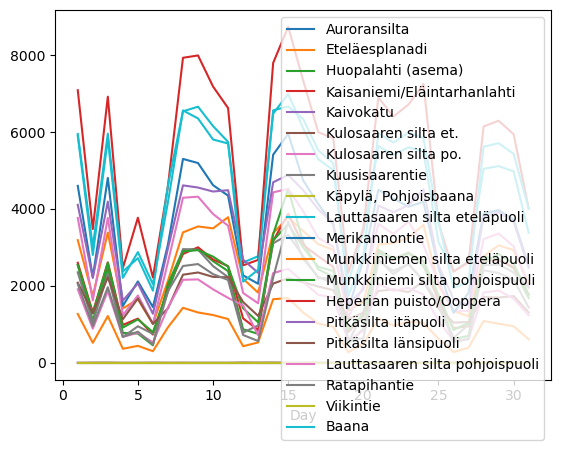

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

def split_date(df):
    """Splits Päivämäärä column into DataFrame with five columns,
    Weekday, Day, Month, Year, and Hour
    """  
    # Split the date into specific columns and add column names
    df = df["Päivämäärä"].str.split(expand=True)
    df.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    # Convert weekdays
    weekdays = {
        "ma": "Mon",
        "ti": "Tue",
        "ke": "Wed",
        "to": "Thu",
        "pe": "Fri",
        "la": "Sat",
        "su": "Sun"
        }
    df.Weekday = df.Weekday.map(weekdays)
    #df.Weekday.replace(weekdays, inplace=True)

    # Convert months
    months = {
        "tammi": 1,
        "helmi": 2,
        "maalis": 3,
        "huhti": 4,
        "touko": 5,
        "kesä": 6,
        "heinä": 7,
        "elo": 8,
        "syys": 9,
        "loka": 10,
        "marras": 11,
        "joulu": 12
    }
    df.Month = df.Month.map(months)

    # Drop columns and minutes for hours
    df.Hour = df.Hour.str.extract(r"(\d+):")
    #df.Hour = df.Hour.str.findall(r"(\d+):").str[0]
    #df.Hour = df.Hour.str.findall(r"(\d+):").str.join("")
    
    # Convert types
    df = df.astype({"Day": int, "Year": int, "Hour": int})

    return df

def cyclists_per_day():
    """Groups rows by year, month, day and gets sum for each group"""
    # Read, clean, and parse data
    df = pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")
    df.dropna(how="all", inplace=True)  # Drop empty rows
    df.dropna(axis=1, how="all", inplace=True)  # Drop empty columns
    date_data = split_date(df)  # Grab specific date columns
    df.drop(columns="Päivämäärä", inplace=True)  # Drop Päivämäärä column
    result = pd.concat([date_data, df], axis=1)  # Add back date data

    # Group by year, month, and day and sum each group (prevent weekday spam)
    sums = result.groupby(by=["Year", "Month", "Day"]).sum(numeric_only=True)
    sums.drop(columns="Hour", inplace=True)  # Drop hour column
    return sums
    
def main():
    df = cyclists_per_day()

    # Part 1
    print(df)

    # Part 2
    selection = df.loc[(2017, 8),:]  # Index is a tuple of year, month, day
    selection.plot()
    plt.show()

if __name__ == "__main__":
    main()

Exercise 5.5 (best record company)

In [133]:
import pandas as pd

def best_record_company():
    """Returns DataFrame of singles by best record company,
    based on sum of weeks on chart of a publisher's singles"""
    # Read in data
    df = pd.read_csv("UK-top40-1964-1-2.tsv", sep="\t")

    # Group by publisher and sum WoC
    ranking = df.groupby("Publisher").sum(numeric_only=True)["WoC"].sort_values(ascending=False)

    # Use the top record as filter for original data
    best = ranking.index[0]
    return df[df.Publisher == best]

def main():
    print(best_record_company())

if __name__ == "__main__":
    main()

    Pos  LW                    Title                    Artist Publisher  \
1     2   6            GLAD ALL OVER       THE DAVE CLARK FIVE  COLUMBIA   
3     4   3     YOU WERE MADE FOR ME  FREDDIE AND THE DREAMERS  COLUMBIA   
9    10   8        DON'T TALK TO HIM             CLIFF RICHARD  COLUMBIA   
11   12  11                 GERONIMO               THE SHADOWS  COLUMBIA   
15   16  12  YOU'LL NEVER WALK ALONE  GERRY AND THE PACEMAKERS  COLUMBIA   
24   25  25     I (WHO HAVE NOTHING)            SHIRLEY BASSEY  COLUMBIA   
39   40  Re            WALKING ALONE           RICHARD ANTHONY  COLUMBIA   

    Peak Pos  WoC  
1          2    7  
3          3    9  
9          2    9  
11        11    5  
15         1   13  
24         6   14  
39        37    2  


Suggested solution:

In [138]:
import pandas as pd
 
def best_record_company():
    df = pd.read_csv("UK-top40-1964-1-2.tsv", sep="\t")
    df2 = df.groupby("Publisher").sum()
    best_company = df2["WoC"].idxmax()
    return df[df["Publisher"] == best_company]
 
def main():
    df = best_record_company()
    print("Shape:", df.shape)
    print("Column names:", df.columns)
    print("dtypes:", df.dtypes)
    print(df)
    
 
if __name__ == "__main__":
    main()

Shape: (7, 7)
Column names: Index(['Pos', 'LW', 'Title', 'Artist', 'Publisher', 'Peak Pos', 'WoC'], dtype='object')
dtypes: Pos           int64
LW           object
Title        object
Artist       object
Publisher    object
Peak Pos      int64
WoC           int64
dtype: object
    Pos  LW                    Title                    Artist Publisher  \
1     2   6            GLAD ALL OVER       THE DAVE CLARK FIVE  COLUMBIA   
3     4   3     YOU WERE MADE FOR ME  FREDDIE AND THE DREAMERS  COLUMBIA   
9    10   8        DON'T TALK TO HIM             CLIFF RICHARD  COLUMBIA   
11   12  11                 GERONIMO               THE SHADOWS  COLUMBIA   
15   16  12  YOU'LL NEVER WALK ALONE  GERRY AND THE PACEMAKERS  COLUMBIA   
24   25  25     I (WHO HAVE NOTHING)            SHIRLEY BASSEY  COLUMBIA   
39   40  Re            WALKING ALONE           RICHARD ANTHONY  COLUMBIA   

    Peak Pos  WoC  
1          2    7  
3          3    9  
9          2    9  
11        11    5  
15         1 

Time series

In [141]:
wh2 = wh3.copy()
wh2.columns

Index(['Year', 'Month', 'Day', 'Time', 'Time zone', 'Precipitation', 'Snow',
       'Temperature'],
      dtype='object')

In [143]:
wh2["Date"] = pd.to_datetime(wh2[["Year", "Month", "Day"]])
wh2.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature,Date
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [145]:
wh2 = wh2.drop(columns=["Year", "Month", "Day"])
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature,Date
0,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [147]:
wh2 = wh2.set_index("Date")
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-01,00:00,UTC,-1.0,-1.0,0.6
2017-01-02,00:00,UTC,4.4,-1.0,-3.9
2017-01-03,00:00,UTC,6.6,7.0,-6.5
2017-01-04,00:00,UTC,-1.0,13.0,-12.8
2017-01-05,00:00,UTC,-1.0,10.0,-17.8


In [149]:
wh2["2017-01-15":"2017-02-03"]

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-15,00:00,UTC,-1.0,8.0,-2.8
2017-01-16,00:00,UTC,-1.0,8.0,-4.2
2017-01-17,00:00,UTC,0.2,8.0,-3.5
2017-01-18,00:00,UTC,0.9,8.0,1.1
2017-01-19,00:00,UTC,-1.0,5.0,1.6
2017-01-20,00:00,UTC,0.3,5.0,-0.6
2017-01-21,00:00,UTC,0.4,5.0,-1.8
2017-01-22,00:00,UTC,0.2,5.0,1.0
2017-01-23,00:00,UTC,0.1,6.0,0.1


In [151]:
r = pd.date_range("2017-07-01", "2017-07-31", freq="w-mon")
r

DatetimeIndex(['2017-07-03', '2017-07-10', '2017-07-17', '2017-07-24',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='W-MON')

In [153]:
wh2.index.difference(r)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=360, freq=None)

In [155]:
wh2.loc[r,:]

,Time,Time zone,Precipitation,Snow,Temperature
2017-07-03,00:00,UTC,2.2,-1.0,14.5
2017-07-10,00:00,UTC,-1.0,-1.0,18.0
2017-07-17,00:00,UTC,2.7,-1.0,15.4
2017-07-24,00:00,UTC,-1.0,-1.0,15.7
2017-07-31,00:00,UTC,0.1,-1.0,17.8


In [157]:
pd.date_range("2017-07-01", "2017-07-31", freq="b")

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='B')

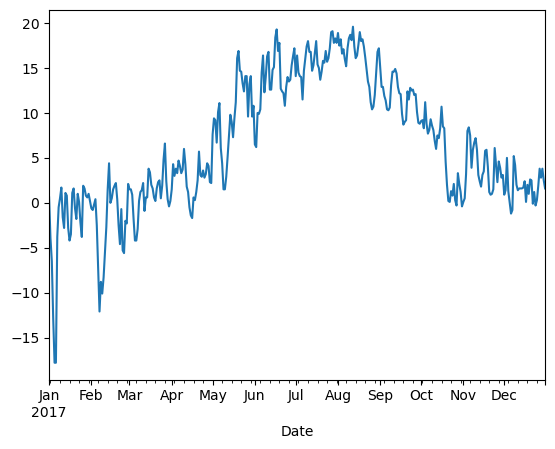

In [178]:
%matplotlib inline
wh2["Temperature"].plot()
plt.show()

In [180]:
rolling = wh2.Temperature.rolling(30, center=True)
rolling

Rolling [window=30,center=True,axis=0,method=single]

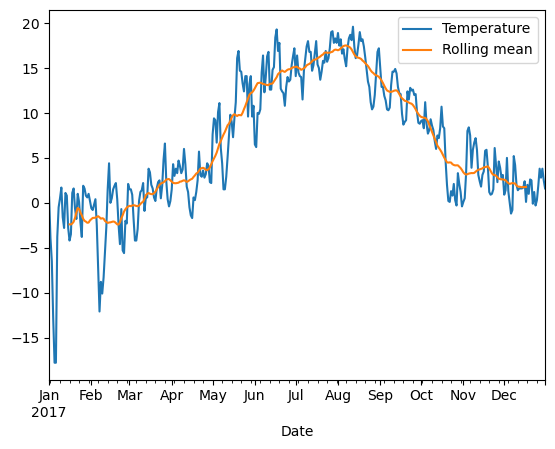

In [188]:
data = pd.DataFrame({"Temperature": wh2.Temperature, "Rolling mean": rolling.mean()})
data.plot()
plt.show()

Exercise 5.8 (bicycle timeseries)

In [191]:
import pandas as pd

def split_date(df):
    """Splits Päivämäärä column into DataFrame with five columns,
    Weekday, Day, Month, Year, and Hour
    """  
    # Split the date into specific columns and add column names
    df = df["Päivämäärä"].str.split(expand=True)
    df.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    # Convert weekdays
    weekdays = {
        "ma": "Mon",
        "ti": "Tue",
        "ke": "Wed",
        "to": "Thu",
        "pe": "Fri",
        "la": "Sat",
        "su": "Sun"
        }
    df.Weekday = df.Weekday.map(weekdays)
    #df.Weekday.replace(weekdays, inplace=True)

    # Convert months
    months = {
        "tammi": 1,
        "helmi": 2,
        "maalis": 3,
        "huhti": 4,
        "touko": 5,
        "kesä": 6,
        "heinä": 7,
        "elo": 8,
        "syys": 9,
        "loka": 10,
        "marras": 11,
        "joulu": 12
    }
    df.Month = df.Month.map(months)

    # Drop columns and minutes for hours
    df.Hour = df.Hour.str.extract(r"(\d+):")
    #df.Hour = df.Hour.str.findall(r"(\d+):").str[0]
    #df.Hour = df.Hour.str.findall(r"(\d+):").str.join("")
    
    # Convert types
    df = df.astype({"Day": int, "Year": int, "Hour": int})

    return df

def bicycle_timeseries():
    """Reads & cleans data, turns date column into Datetimeindex"""
    df = pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")
    df.dropna(how="all", inplace=True)  # Drop empty rows
    df.dropna(axis=1, how="all", inplace=True)  # Drop empty columns
    date_data = split_date(df)  # Grab specific date columns
    result = pd.concat([date_data, df], axis=1)  # Add back date data
    result["Päivämäärä"] = pd.to_datetime(
        result[["Day", "Month", "Year", "Hour"]]
        )  # Add datetime
    # Drop specific date columns
    result.drop(columns=["Weekday", "Day", "Month", "Year", "Hour"], inplace=True)
    result.set_index("Päivämäärä", inplace=True)  # Set datetime as index
    return result

def main():
    print(bicycle_timeseries())

if __name__ == "__main__":
    main()

                     Auroransilta  Eteläesplanadi  Huopalahti (asema)  \
Päivämäärä                                                              
2014-01-01 00:00:00           NaN             7.0                 NaN   
2014-01-01 01:00:00           NaN             5.0                 NaN   
2014-01-01 02:00:00           NaN             2.0                 NaN   
2014-01-01 03:00:00           NaN             5.0                 NaN   
2014-01-01 04:00:00           NaN             1.0                 NaN   
...                           ...             ...                 ...   
2018-03-27 19:00:00          21.0            30.0                18.0   
2018-03-27 20:00:00          10.0            19.0                19.0   
2018-03-27 21:00:00           7.0            13.0                10.0   
2018-03-27 22:00:00           1.0             5.0                 5.0   
2018-03-27 23:00:00           0.0             0.0                 0.0   

                     Kaisaniemi/Eläintarhanlahti  

Exercise 5.9 (commute)

/var/folders/qy/5pm1cj9n2tg60w8wm_b_xx180000gn/T/ipykernel_77258/2009861542.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(weekdays)


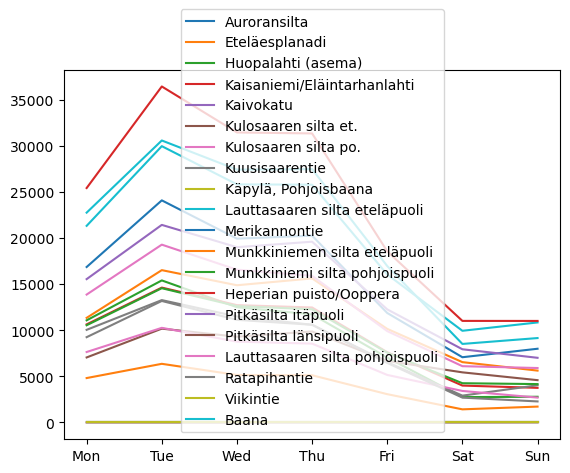

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
 
def split_date(df):
    """Splits Päivämäärä column into DataFrame with five columns,
    Weekday, Day, Month, Year, and Hour
    """  
    # Split the date into specific columns and add column names
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
 
    # Convert weekdays
    weekdays = {
        "ma": "Mon",
        "ti": "Tue",
        "ke": "Wed",
        "to": "Thu",
        "pe": "Fri",
        "la": "Sat",
        "su": "Sun"
        }
    d.Weekday = d.Weekday.map(weekdays)
 
    # Convert months
    months = {
        "tammi": 1,
        "helmi": 2,
        "maalis": 3,
        "huhti": 4,
        "touko": 5,
        "kesä": 6,
        "heinä": 7,
        "elo": 8,
        "syys": 9,
        "loka": 10,
        "marras": 11,
        "joulu": 12
    }
    d.Month = d.Month.map(months)
 
    # Drop columns and minutes for hours
    d.Hour = d.Hour.str.extract(r"(\d+):")
 
    # Convert types
    d = d.astype({"Day": int, "Year": int, "Hour": int})
 
    return d
 
def bicycle_timeseries():
    """Reads & cleans data, turns date column into Datetimeindex"""
    df = pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")
    df.dropna(how="all", inplace=True)  # Drop empty rows
    df.dropna(axis=1, how="all", inplace=True)  # Drop empty columns
    date_data = split_date(df)  # Grab specific date columns
    result = pd.concat([date_data, df], axis=1)  # Add back date data
    result["Päivämäärä"] = pd.to_datetime(
        result[["Year", "Month", "Day"]]
        )  # Add datetime
    result.set_index("Päivämäärä", inplace=True)  # Set datetime as index
    return result
 
def commute():
    # Get bicycle data
    df = bicycle_timeseries()
 
    # Restrict to August 2017, group by weekday, aggregate by sum
    r = pd.date_range("2017-08-01", "2017-08-31")
    # selection = df["2017-08-01":"2017-08-31"]
    selection = df.loc[r,:]
    selection.drop(columns=["Day", "Month", "Year", "Hour"], inplace=True)
    groups = selection.groupby("Weekday").sum()
 
    # Set Weekday column to numbers from one to seven
    groups.index = [5, 1, 6, 7, 4, 2, 3]
    groups.sort_index(inplace=True)
    return groups
    
def main():
    df = commute()
    df.plot()
    weekdays = "x mon tue wed thu fri sat sun".title().split()
    plt.gca().set_xticklabels(weekdays)
    plt.show()
 
if __name__ == "__main__":
    main()

Additional information

https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf